In [1]:
# Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [4]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/Churn_Modelling.csv')

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

In [ ]:
print(dataset)

      RowNumber  CustomerId    Surname  ...  IsActiveMember EstimatedSalary Exited
0             1    15634602   Hargrave  ...               1       101348.88      1
1             2    15647311       Hill  ...               1       112542.58      0
2             3    15619304       Onio  ...               0       113931.57      1
3             4    15701354       Boni  ...               0        93826.63      0
4             5    15737888   Mitchell  ...               1        79084.10      0
...         ...         ...        ...  ...             ...             ...    ...
9995       9996    15606229   Obijiaku  ...               0        96270.64      0
9996       9997    15569892  Johnstone  ...               1       101699.77      0
9997       9998    15584532        Liu  ...               1        42085.58      1
9998       9999    15682355  Sabbatini  ...               0        92888.52      1
9999      10000    15628319     Walker  ...               0        38190.78      0

[10

In [6]:
#Print Total number of Rows & columns in dataset
print(dataset.shape)

(10000, 14)


In [7]:
#Print Information about data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
types = dataset.dtypes
print(types)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [10]:
#Count total number of classes in Data
class_counts = dataset.groupby('NumOfProducts').size()

print(class_counts)

NumOfProducts
1    5084
2    4590
3     266
4      60
dtype: int64


In [11]:
#Count total number of classes in Data
class_counts = dataset.groupby('IsActiveMember').size()
print(class_counts)

IsActiveMember
0    4849
1    5151
dtype: int64


In [12]:
 
#Count total number of classes in Data
class_counts = dataset.groupby('Geography').size()
print(class_counts)

Geography
France     5014
Germany    2509
Spain      2477
dtype: int64


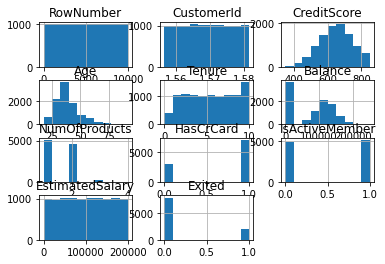

In [13]:
from matplotlib import pyplot
dataset.hist()
pyplot.show()

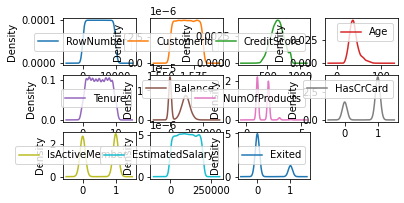

In [14]:
dataset.plot(kind='density' ,subplots=True, layout=(4,4), sharex=False)
pyplot.show()

In [19]:
# Extracting dependent and independent variables:
# Extracting independent variable:
# [:,3:13] : All Rows, 3 to 13 column 
X = dataset.iloc[:,3:13].values
# Extracting dependent variable:
y = dataset.iloc[:, 13].values


In [20]:
print(X)


[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [21]:
print(y)

[1 0 1 ... 1 1 0]


In [22]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [23]:
# Encoding Categorical data:
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])

In [ ]:
print(X)

[[619 0 'Female' ... 1 1 101348.88]
 [608 2 'Female' ... 0 1 112542.58]
 [502 0 'Female' ... 1 0 113931.57]
 ...
 [709 0 'Female' ... 0 1 42085.58]
 [772 1 'Male' ... 1 0 92888.52]
 [792 0 'Female' ... 1 0 38190.78]]


In [24]:
# Encoding Categorical data:
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 2] = labelencoder_X.fit_transform(X[:, 2])

In [25]:
print(X)

[[619 0 0 ... 1 1 101348.88]
 [608 2 0 ... 0 1 112542.58]
 [502 0 0 ... 1 0 113931.57]
 ...
 [709 0 0 ... 0 1 42085.58]
 [772 1 1 ... 1 0 92888.52]
 [792 0 0 ... 1 0 38190.78]]


In [26]:
 #dummy encoding.
 from sklearn.preprocessing import OneHotEncoder
 from sklearn.compose import ColumnTransformer

 columnTransformer = ColumnTransformer([('Smita', OneHotEncoder(), [1])],remainder='passthrough')
 X=columnTransformer.fit_transform(X)


 

In [27]:
print(X)
X

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [28]:
 # Dummy Variable trapping
 X = X[:, 1:]

In [30]:
print(X)
X

[[0.0 0.0 619 ... 1 1 101348.88]
 [0.0 1.0 608 ... 0 1 112542.58]
 [0.0 0.0 502 ... 1 0 113931.57]
 ...
 [0.0 0.0 709 ... 0 1 42085.58]
 [1.0 0.0 772 ... 1 0 92888.52]
 [0.0 0.0 792 ... 1 0 38190.78]]


array([[0.0, 0.0, 619, ..., 1, 1, 101348.88],
       [0.0, 1.0, 608, ..., 0, 1, 112542.58],
       [0.0, 0.0, 502, ..., 1, 0, 113931.57],
       ...,
       [0.0, 0.0, 709, ..., 0, 1, 42085.58],
       [1.0, 0.0, 772, ..., 1, 0, 92888.52],
       [0.0, 0.0, 792, ..., 1, 0, 38190.78]], dtype=object)

In [31]:
# Splitting the Dataset into the Training set and Test set

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
print(X_train)

[[0.0 0.0 686 ... 1 1 179093.26]
 [1.0 0.0 632 ... 1 1 195978.86]
 [0.0 1.0 559 ... 1 0 85891.02]
 ...
 [0.0 0.0 735 ... 0 0 92220.12]
 [0.0 0.0 667 ... 1 0 97508.04]
 [1.0 0.0 697 ... 1 1 53581.14]]


In [33]:
print(y_train)

[0 0 1 ... 1 1 0]


In [34]:
print(X_test)

[[1.0 0.0 596 ... 0 0 41788.37]
 [0.0 0.0 623 ... 1 1 146379.3]
 [0.0 1.0 601 ... 1 0 58561.31]
 ...
 [0.0 0.0 730 ... 1 0 33373.26]
 [0.0 0.0 692 ... 1 0 76755.99]
 [1.0 0.0 628 ... 1 1 107674.3]]


In [35]:
print(y_test)

[0 0 0 ... 1 1 1]


In [36]:
# Feature Scaling
# Standard Scaling:  Standardization = X'=X-mean(X)/standard deviation
# normal scaling : Normalization= X'=X-min(X)/max(x)-min(X)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
print(X_train)

[[-0.57946723 -0.57638802  0.35649971 ...  0.64920267  0.97481699
   1.36766974]
 [ 1.72572313 -0.57638802 -0.20389777 ...  0.64920267  0.97481699
   1.6612541 ]
 [-0.57946723  1.73494238 -0.96147213 ...  0.64920267 -1.02583358
  -0.25280688]
 ...
 [-0.57946723 -0.57638802  0.86500853 ... -1.54035103 -1.02583358
  -0.1427649 ]
 [-0.57946723 -0.57638802  0.15932282 ...  0.64920267 -1.02583358
  -0.05082558]
 [ 1.72572313 -0.57638802  0.47065475 ...  0.64920267  0.97481699
  -0.81456811]]


In [37]:
print(X_test)

[[ 1.72572313 -0.57638802 -0.57749609 ... -1.54035103 -1.02583358
  -1.01960511]
 [-0.57946723 -0.57638802 -0.29729735 ...  0.64920267  0.97481699
   0.79888291]
 [-0.57946723  1.73494238 -0.52560743 ...  0.64920267 -1.02583358
  -0.72797953]
 ...
 [-0.57946723 -0.57638802  0.81311987 ...  0.64920267 -1.02583358
  -1.16591585]
 [-0.57946723 -0.57638802  0.41876609 ...  0.64920267 -1.02583358
  -0.41163463]
 [ 1.72572313 -0.57638802 -0.24540869 ...  0.64920267  0.97481699
   0.12593183]]


In [39]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [40]:
# Initialising the ANN
model = Sequential()
print(model)

In [43]:
# Adding the input layer and the first hidden layer
#model.add(Dense(output_dim=6, init = 'uniform', activation = 'relu', input_dim = 11))Verson Changed
model.add(Dense(units=6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
# units6 menas how many neuron (node) need in first hidden layer 
# uniform is weight intialization method 
# Adding the second hidden layer
model.add(Dense(units= 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
model.add(Dense(units= 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# why sigmoid use here beacuse its binary classifier output is 1 or 0 if multiclass output use softmax 

In [45]:
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [46]:
# Fitting the ANN to the Training set
from timeit import default_timer as timer
start = timer()


history=model.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose=1)
end = timer() 
print("Time Elapsed in seconds",  (end - start))


Epoch 1/100
800/800 [==============================] - 4s 2ms/step - loss: 0.6142 - accuracy: 0.7913
Epoch 2/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4963 - accuracy: 0.8024
Epoch 3/100
800/800 [==============================] - 2s 2ms/step - loss: 0.5038 - accuracy: 0.7960
Epoch 4/100
800/800 [==============================] - 2s 2ms/step - loss: 0.5012 - accuracy: 0.7954
Epoch 5/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4833 - accuracy: 0.7984
Epoch 6/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4729 - accuracy: 0.7947
Epoch 7/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4591 - accuracy: 0.7926
Epoch 8/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4536 - accuracy: 0.7891
Epoch 9/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4464 - accuracy: 0.7910
Epoch 10/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4440 - accura

dict_keys(['loss', 'accuracy'])


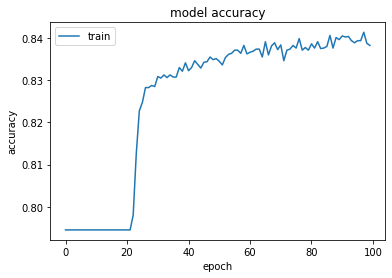

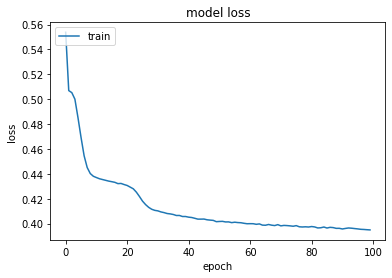

In [47]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# New Section

# New Section

In [48]:
# save model and architecture to single file 
model.save('/content/drive/MyDrive/Colab Notebooks/churnmodelANN.h5')
model.summary()

print("Saved model to disk")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 1

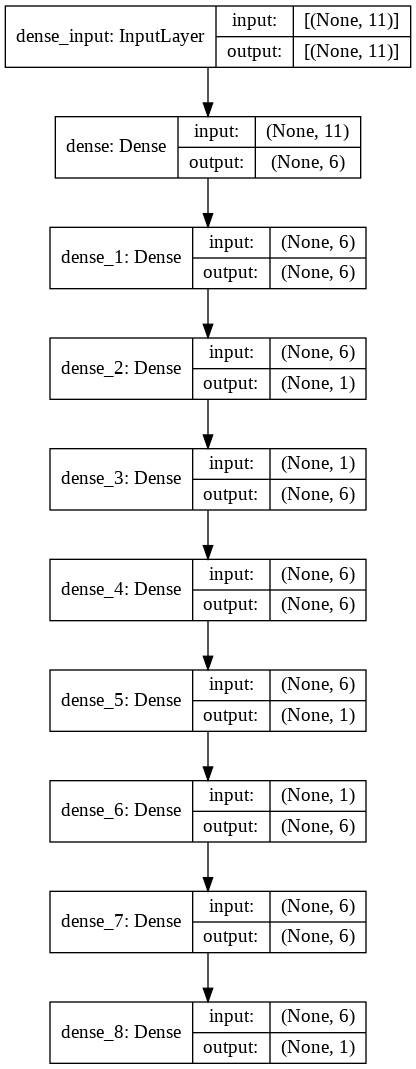

In [49]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot_CNN.png', show_shapes=True, show_layer_names=True)

In [50]:
# Loading saved model from Drive.
from keras.models import load_model
model = load_model('/content/drive/My Drive/Colab Notebooks/churnmodelANN.h5')
print("Model is Loaded")
model.summary()

Model is Loaded
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
_________________________________________________________________
dense_6 (Dense)              (None, 6)  

In [51]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred


array([[0.14218797],
       [0.08253446],
       [0.27137735],
       ...,
       [0.5815049 ],
       [0.06033492],
       [0.1529362 ]], dtype=float32)

In [52]:
y_pred = (y_pred > 0.5)


In [53]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix: ')
print(cm)

Confusion matrix: 
[[1551   56]
 [ 259  134]]


In [54]:
# calculate Accuracy
#               Y_pred
#             0       1
#          0[64     4(FP)]  Type 1 Error
# y-test   1[3(FN)     29]  Type 2 Error
# Accuracy 64+29/64+4+3+29
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 84.25


In [55]:
from sklearn.metrics import precision_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
#               Y_pred
#             0       1
#          0[64     4(FP)]  Type 1 Error
# y-test   1[3(FN)     29]  Type 2 Error
# precision= 29/29+4
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))

Precision: 70.526


In [56]:
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
#               Y_pred
#             0       1
#          0[64     4(FP)]  Type 1 Error
# y-test   1[3(FN)     29]  Type 2 Error
# precision= 29/29+3
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))

Recall: 34.097


In [57]:
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# score= (2*87.879* 90.625)/87.879+ 90.625
# calculate score
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

F-Measure: 45.969


In [58]:
x1 = np.random.rand(11)

print("x1 ndim: ", x1.ndim)
print("x1 shape:", x1.shape)
print("x1 size: ", x1.size)

x1

x1 ndim:  1
x1 shape: (11,)
x1 size:  11


array([0.69466292, 0.20846101, 0.73034089, 0.44217369, 0.69952267,
       0.13363234, 0.59738217, 0.87946418, 0.33748256, 0.37370602,
       0.20848908])

In [59]:
# Predicting a single new observation
"""Predict if the customer with the following informations will leave the bank:
Geography: France
Credit Score: 600
Gender: Male
Age: 40
Tenure: 3
Balance: 60000
Number of Products: 2
Has Credit Card: Yes
Is Active Member: Yes
Estimated Salary: 50000"""

'Predict if the customer with the following informations will leave the bank:\nGeography: France\nCredit Score: 600\nGender: Male\nAge: 40\nTenure: 3\nBalance: 60000\nNumber of Products: 2\nHas Credit Card: Yes\nIs Active Member: Yes\nEstimated Salary: 50000'

In [60]:
CreditScore =  600#@param {type:"number"}
Geography =  0.0#@param {type:"number"}
Gender = 0 #@param {type:"number"}
Age =  40#@param {type:"number"}
Tenure =  3#@param {type:"number"}
Balance = 60000 #@param {type:"number"}
NumOfProducts = 2 #@param {type:"number"}
HasCrCard = 0 #@param {type:"number"}
IsActiveMember =  1#@param {type:"number"}
EstimatedSalary = 0 #@param {type:"number"}
Exited = 0 #@param {type:"number"}


In [61]:
y_pred=model.predict(sc_X.transform(np.array([[0.0,CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary]])))
print("Prediction is:", y_pred)
if y_pred>0.5:
  print("Custome will not exit")
else:
  print("Customer will exit")

Prediction is: [[0.05200196]]
Customer will exit


In [62]:
# Part 4 - Evaluating, Improving and Tuning the ANN

# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.std()


In [63]:
print("The mean of Accuraciers is:",  mean)
print("Variance is ",variance )

The mean of Accuraciers is: 0.8356250047683715
Variance is  0.012577877634598686


In [64]:
# Dropour Regularization
from keras.layers import Dropout
# classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
# classifier.add(0.1)
# classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu')
# classifier.add(0.1)



In [ ]:
# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs': [10, 20],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/10
288/288 [==============================] - 1s 2ms/step - loss: 0.6344 - accuracy: 0.7901
Epoch 2/10
288/288 [==============================] - 0s 2ms/step - loss: 0.4342 - accuracy: 0.7963
Epoch 3/10
288/288 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.7966
Epoch 4/10
288/288 [==============================] - 0s 2ms/step - loss: 0.4258 - accuracy: 0.7868
Epoch 5/10
288/288 [==============================] - 0s 2ms/step - loss: 0.4167 - accuracy: 0.7963
Epoch 6/10
288/288 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8048
Epoch 7/10
288/288 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.8181
Epoch 8/10
288/288 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.8259
Epoch 9/10
288/288 [==============================] - 0s 2ms/step - loss: 0.4252 - accuracy: 0.8217
Epoch 10/10
288/288 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8254

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


288/288 [==============================] - 1s 2ms/step - loss: 0.6408 - accuracy: 0.7907
Epoch 2/10
288/288 [==============================] - 0s 2ms/step - loss: 0.4522 - accuracy: 0.7925
Epoch 3/10
288/288 [==============================] - 0s 2ms/step - loss: 0.4402 - accuracy: 0.7898
Epoch 4/10
288/288 [==============================] - 0s 2ms/step - loss: 0.4274 - accuracy: 0.7969
Epoch 5/10
288/288 [==============================] - 0s 2ms/step - loss: 0.4422 - accuracy: 0.7904
Epoch 6/10
288/288 [==============================] - 0s 2ms/step - loss: 0.4371 - accuracy: 0.7888
Epoch 7/10
288/288 [==============================] - 0s 2ms/step - loss: 0.4223 - accuracy: 0.8060
Epoch 8/10
288/288 [==============================] - 0s 2ms/step - loss: 0.4398 - accuracy: 0.7894
Epoch 9/10
288/288 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.7923
Epoch 10/10
288/288 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.8029
Epoch 1/10

In [ ]:
print("Best Parameters", best_parameters)
print("Best Accuracy", best_accuracy)

Best Parameters {'batch_size': 25, 'epochs': 20, 'optimizer': 'rmsprop'}
Best Accuracy 0.841375
